In [28]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [3]:
pwd = os.getcwd()
path = os.path.join(pwd, os.pardir, 'data/clean_data.csv')

In [4]:
db = pd.read_csv(path)
db.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [5]:
user_experience_db = db.groupby('MSISDN/Number').agg({
    "Handset Type": "first",
    "Avg RTT DL (ms)": "sum",
    "Avg RTT UL (ms)": "sum",
    "Avg Bearer TP DL (kbps)": "sum",
    "Avg Bearer TP UL (kbps)": "sum",
    "TCP DL Retrans. Vol (Bytes)": "sum",
    "TCP UL Retrans. Vol (Bytes)": "sum",
}).rename(columns={
    "Bearer Id": "Session Count"
})
user_experience_db.head()

,Handset Type,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes)
MSISDN/Number,,,,,,,
3.360100e+10,Huawei P20 Lite Huawei Nova 3E,46.0,0.0,37.0,39.0,21006809.0,771052.0
3.360100e+10,Apple iPhone 7 (A1778),30.0,1.0,48.0,51.0,21006809.0,771052.0
3.360100e+10,unknown,106.0,18.0,48.0,49.0,21006809.0,771052.0
3.360101e+10,Apple iPhone 5S (A1457),69.0,15.0,204.0,44.0,1066.0,771052.0
3.360101e+10,Apple iPhone Se (A1723),114.0,5.0,40395.0,16449.0,30356439.0,792254.0


In [6]:
user_experience_db['Average RTT (ms)'] = user_experience_db['Avg RTT DL (ms)'] + user_experience_db['Avg RTT UL (ms)']
user_experience_db['Average TCP retransmission (Bytes)'] = user_experience_db['TCP DL Retrans. Vol (Bytes)'] + user_experience_db['TCP UL Retrans. Vol (Bytes)']
user_experience_db['Average Throughput (kbps)'] = user_experience_db['Avg Bearer TP DL (kbps)'] + user_experience_db['Avg Bearer TP UL (kbps)']

In [7]:
user_experience_db.head()

,Handset Type,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Average RTT (ms),Average TCP retransmission (Bytes),Average Throughput (kbps)
MSISDN/Number,,,,,,,,,,
3.360100e+10,Huawei P20 Lite Huawei Nova 3E,46.0,0.0,37.0,39.0,21006809.0,771052.0,46.0,21777861.0,76.0
3.360100e+10,Apple iPhone 7 (A1778),30.0,1.0,48.0,51.0,21006809.0,771052.0,31.0,21777861.0,99.0
3.360100e+10,unknown,106.0,18.0,48.0,49.0,21006809.0,771052.0,124.0,21777861.0,97.0
3.360101e+10,Apple iPhone 5S (A1457),69.0,15.0,204.0,44.0,1066.0,771052.0,84.0,772118.0,248.0
3.360101e+10,Apple iPhone Se (A1723),114.0,5.0,40395.0,16449.0,30356439.0,792254.0,119.0,31148693.0,56844.0


In [8]:
user_experience_db.nlargest(n=10, columns='Average TCP retransmission (Bytes)')

,Handset Type,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Average RTT (ms),Average TCP retransmission (Bytes),Average Throughput (kbps)
MSISDN/Number,,,,,,,,,,
3.366773e+10,Huawei B528S-23A,572.0,131.0,312316.0,67397.0,8.332733e+09,2.147633e+07,703.0,8.354209e+09,379713.0
3.365908e+10,Huawei B528S-23A,281.0,115.0,164449.0,45810.0,7.938179e+09,3.681679e+06,396.0,7.941860e+09,210259.0
3.366098e+10,Huawei B528S-23A,255.0,162.0,208133.0,8719.0,7.374101e+09,8.092740e+05,417.0,7.374910e+09,216852.0
3.376128e+10,Huawei B528S-23A,313.0,38.0,99351.0,45219.0,6.039192e+09,4.786675e+06,351.0,6.043978e+09,144570.0
3.376264e+10,Huawei B528S-23A,1411.0,1449.0,453489.0,96172.0,5.878002e+09,1.986547e+06,2860.0,5.879989e+09,549661.0
3.365066e+10,Huawei B528S-23A,1364.0,179.0,224292.0,35256.0,5.590344e+09,3.022140e+06,1543.0,5.593366e+09,259548.0
3.366318e+10,Huawei B528S-23A,486.0,97.0,114022.0,13581.0,5.562845e+09,4.083422e+06,583.0,5.566929e+09,127603.0
3.366905e+10,Huawei B528S-23A,195.0,126.0,102759.0,39283.0,2.663509e+07,5.169358e+09,321.0,5.195993e+09,142042.0
3.376357e+10,Huawei B528S-23A,427.0,52.0,114004.0,6284.0,5.178607e+09,8.515830e+05,479.0,5.179459e+09,120288.0


In [9]:
user_experience_db.nsmallest(n=10, columns='Average TCP retransmission (Bytes)')

,Handset Type,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Average RTT (ms),Average TCP retransmission (Bytes),Average Throughput (kbps)
MSISDN/Number,,,,,,,,,,
3.365013e+10,Apple iPhone 5S (A1457),46.0,2.0,30230.0,351.0,51.0,46.0,48.0,97.0,30581.0
3.361478e+10,Huawei Ascend Mate7,39.0,25.0,8498.0,156.0,86.0,42.0,64.0,128.0,8654.0
3.376206e+10,Apple iPhone 8 (A1905),39.0,2.0,31540.0,1037.0,38.0,91.0,41.0,129.0,32577.0
3.362636e+10,Apple iPhone 7 (A1778),34.0,6.0,10128.0,836.0,92.0,42.0,40.0,134.0,10964.0
3.360783e+10,Apple iPhone 5C (A1529),29.0,3.0,16242.0,611.0,62.0,81.0,32.0,143.0,16853.0
3.365068e+10,Xiaomi Communica. Mi Max3,26.0,26.0,6581.0,458.0,138.0,38.0,52.0,176.0,7039.0
3.376964e+10,Apple iPhone 5S (A1457),31.0,1.0,11982.0,228.0,114.0,62.0,32.0,176.0,12210.0
3.378420e+10,Apple iPhone Xr (A2108),33.0,41.0,5521.0,376.0,74.0,103.0,74.0,177.0,5897.0
3.367937e+10,Samsung Galaxy S6 Plus (Sm-G928),33.0,6.0,33894.0,1174.0,128.0,51.0,39.0,179.0,35068.0


In [10]:
user_experience_db.value_counts(subset=['Average TCP retransmission (Bytes)'])[:10]

Average TCP retransmission (Bytes)
21777861.0                            47122
43555722.0                             7468
65333583.0                             1032
21008103.0                              363
87111444.0                              252
21008139.0                              164
772382.0                                144
42785964.0                               82
21008127.0                               81
771144.0                                 76
dtype: int64

In [11]:
user_experience_db.nlargest(n=10, columns='Average RTT (ms)')

,Handset Type,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Average RTT (ms),Average TCP retransmission (Bytes),Average Throughput (kbps)
MSISDN/Number,,,,,,,,,,
3.366232e+10,Apple iPhone 8 (A1905),96923.0,1.0,1.0,2.0,21006809.0,771052.0,96924.0,21777861.0,3.0
3.366087e+10,Apple iPhone 6 (A1586),64666.0,4.0,87.0,107.0,42013618.0,1542104.0,64670.0,43555722.0,194.0
3.368369e+10,Lg Lg-D315,54847.0,1.0,12.0,9.0,92.0,771052.0,54848.0,771144.0,21.0
3.369855e+10,Huawei B528S-23A,45923.0,98.0,85.0,218.0,21012129.0,10319.0,46021.0,21022448.0,303.0
3.376181e+10,Huawei B528S-23A,36977.0,107.0,11976.0,9224.0,21029692.0,53402.0,37084.0,21083094.0,21200.0
3.366879e+10,Huawei B528S-23A,36125.0,179.0,99.0,9.0,42013618.0,1542104.0,36304.0,43555722.0,108.0
3.376094e+10,Samsung Galaxy S7 Edge (Sm-G935X),26971.0,307.0,3778.0,1370.0,522969.0,17613.0,27278.0,540582.0,5148.0
3.360679e+10,Samsung Galaxy S9 Plus (Sm-G965F),26250.0,50.0,124.0,20.0,13300.0,771052.0,26300.0,784352.0,144.0
3.367182e+10,Samsung Galaxy S6 Edge (Sm-G925X),25602.0,113.0,5.0,66.0,21006809.0,5320.0,25715.0,21012129.0,71.0


In [12]:
user_experience_db.nsmallest(n=10, columns='Average RTT (ms)')

,Handset Type,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Average RTT (ms),Average TCP retransmission (Bytes),Average Throughput (kbps)
MSISDN/Number,,,,,,,,,,
3.365298e+10,Huawei P20 Pro,0.0,0.0,52.0,48.0,21006809.0,771052.0,0.0,21777861.0,100.0
3.366158e+10,Huawei Pct-L29,0.0,0.0,38.0,47.0,21006809.0,771052.0,0.0,21777861.0,85.0
3.366020e+10,Apple iPhone X (A1901),2.0,0.0,46.0,67.0,21006809.0,771052.0,2.0,21777861.0,113.0
3.369505e+10,Huawei P20,4.0,0.0,66.0,55.0,21006809.0,771052.0,4.0,21777861.0,121.0
3.365949e+10,Apple iPhone 6S (A1688),5.0,0.0,23.0,55.0,21006809.0,771052.0,5.0,21777861.0,78.0
3.366862e+10,Apple iPhone 6S (A1688),6.0,0.0,46.0,55.0,21006809.0,771052.0,6.0,21777861.0,101.0
3.364768e+10,Huawei Honor View10,8.0,0.0,63.0,47.0,21006809.0,771052.0,8.0,21777861.0,110.0
3.361085e+10,Samsung Galaxy S6 Edge (Sm-G925X),9.0,0.0,59.0,54.0,21006809.0,771052.0,9.0,21777861.0,113.0
3.367220e+10,Huawei P20 Lite Huawei Nova 3E,9.0,0.0,44.0,47.0,21006809.0,771052.0,9.0,21777861.0,91.0


In [13]:
user_experience_db.value_counts(subset=['Average RTT (ms)'])[:10]

Average RTT (ms)
124.0               16539
29.0                 2735
39.0                 2163
248.0                1957
38.0                 1447
30.0                 1419
40.0                 1382
28.0                 1330
49.0                 1192
31.0                 1053
dtype: int64

In [14]:
user_experience_db.nlargest(n=10, columns='Average Throughput (kbps)')

,Handset Type,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Average RTT (ms),Average TCP retransmission (Bytes),Average Throughput (kbps)
MSISDN/Number,,,,,,,,,,
3.376233e+10,Samsung Galaxy A8 (2018),251.0,149.0,846163.0,56059.0,2.500780e+07,3106030.0,400.0,2.811382e+07,902222.0
3.366871e+10,Huawei B528S-23A,310.0,190.0,680994.0,159430.0,1.413487e+08,1638425.0,500.0,1.429871e+08,840424.0
3.365955e+10,Huawei B528S-23A,371.0,217.0,670930.0,127412.0,3.254110e+07,2198163.0,588.0,3.473926e+07,798342.0
3.366995e+10,Huawei B528S-23A,190.0,180.0,581209.0,109606.0,6.261887e+07,98687.0,370.0,6.271756e+07,690815.0
3.366843e+10,Huawei B528S-23A,284.0,98.0,658687.0,18171.0,7.873747e+08,284930.0,382.0,7.876596e+08,676858.0
3.369817e+10,unknown,397.0,81.0,606931.0,11866.0,1.240832e+08,2640043.0,478.0,1.267232e+08,618797.0
3.362570e+10,Samsung Galaxy S9 Sm-G960F Ds,594.0,108.0,556109.0,8070.0,6.927152e+07,2355773.0,702.0,7.162730e+07,564179.0
3.365808e+10,Huawei B528S-23A,438.0,129.0,386767.0,163585.0,2.854412e+07,239972.0,567.0,2.878409e+07,550352.0
3.376264e+10,Huawei B528S-23A,1411.0,1449.0,453489.0,96172.0,5.878002e+09,1986547.0,2860.0,5.879989e+09,549661.0


In [15]:
user_experience_db.nsmallest(n=10, columns='Average Throughput (kbps)')

,Handset Type,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Average RTT (ms),Average TCP retransmission (Bytes),Average Throughput (kbps)
MSISDN/Number,,,,,,,,,,
3.360345e+10,Samsung Galaxy S9 Sm-G960F Ds,106.0,18.0,0.0,0.0,21006809.0,771052.0,124.0,21777861.0,0.0
3.360413e+10,Lenovo Moto G (3Rd Gen) Ca12459445,106.0,18.0,0.0,0.0,21006809.0,771052.0,124.0,21777861.0,0.0
3.360851e+10,unknown,106.0,18.0,0.0,0.0,21006809.0,771052.0,124.0,21777861.0,0.0
3.360875e+10,Samsung Galaxy J3 (Sm-J320X),106.0,18.0,0.0,0.0,21006809.0,771052.0,124.0,21777861.0,0.0
3.360889e+10,Samsung Galaxy S8 (Sm-G950F),106.0,18.0,0.0,0.0,21006809.0,771052.0,124.0,21777861.0,0.0
3.360985e+10,Samsung Galaxy S7 Edge (Sm-G935X),106.0,18.0,0.0,0.0,21006809.0,771052.0,124.0,21777861.0,0.0
3.361064e+10,unknown,106.0,18.0,0.0,0.0,21006809.0,771052.0,124.0,21777861.0,0.0
3.361152e+10,Samsung Galaxy S7 Edge (Sm-G935X),212.0,36.0,0.0,0.0,42013618.0,1542104.0,248.0,43555722.0,0.0
3.361611e+10,Apple iPhone Xr (A2105),106.0,18.0,0.0,0.0,21006809.0,771052.0,124.0,21777861.0,0.0


In [16]:
user_experience_db.value_counts(subset=['Average Throughput (kbps)'])[:10]

Average Throughput (kbps)
15.0                         2687
63.0                         2072
97.0                         1024
90.0                         1006
98.0                          970
96.0                          866
99.0                          853
89.0                          816
95.0                          798
91.0                          793
dtype: int64

In [19]:
user_experience_db.groupby(by=["Handset Type"], as_index=False).agg({"Average Throughput (kbps)": 'count'}).nlargest(n=10, columns="Average Throughput (kbps)")

,Handset Type,Average Throughput (kbps)
315,Huawei B528S-23A,10615
53,Apple iPhone 6S (A1688),6744
1390,unknown,6648
49,Apple iPhone 6 (A1586),6245
59,Apple iPhone 7 (A1778),4675
73,Apple iPhone Se (A1723),3743
66,Apple iPhone 8 (A1905),3535
951,Samsung Galaxy S8 (Sm-G950F),3232
78,Apple iPhone Xr (A2105),3066
884,Samsung Galaxy J5 (Sm-J530),2741


In [20]:
user_experience_db.groupby(by=["Handset Type"], as_index=False).agg({"Average TCP retransmission (Bytes)": 'sum'}).nlargest(n=10, columns="Average TCP retransmission (Bytes)")

,Handset Type,Average TCP retransmission (Bytes)
315,Huawei B528S-23A,1.087426e+12
53,Apple iPhone 6S (A1688),1.731809e+11
49,Apple iPhone 6 (A1586),1.536334e+11
1390,unknown,1.474520e+11
59,Apple iPhone 7 (A1778),1.058726e+11
73,Apple iPhone Se (A1723),9.280974e+10
66,Apple iPhone 8 (A1905),8.769675e+10
78,Apple iPhone Xr (A2105),8.471220e+10
951,Samsung Galaxy S8 (Sm-G950F),6.962433e+10
75,Apple iPhone X (A1901),6.785309e+10


In [21]:
user_experience_db.head()

,Handset Type,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Average RTT (ms),Average TCP retransmission (Bytes),Average Throughput (kbps)
MSISDN/Number,,,,,,,,,,
3.360100e+10,Huawei P20 Lite Huawei Nova 3E,46.0,0.0,37.0,39.0,21006809.0,771052.0,46.0,21777861.0,76.0
3.360100e+10,Apple iPhone 7 (A1778),30.0,1.0,48.0,51.0,21006809.0,771052.0,31.0,21777861.0,99.0
3.360100e+10,unknown,106.0,18.0,48.0,49.0,21006809.0,771052.0,124.0,21777861.0,97.0
3.360101e+10,Apple iPhone 5S (A1457),69.0,15.0,204.0,44.0,1066.0,771052.0,84.0,772118.0,248.0
3.360101e+10,Apple iPhone Se (A1723),114.0,5.0,40395.0,16449.0,30356439.0,792254.0,119.0,31148693.0,56844.0


In [23]:
scaler = MinMaxScaler()

In [25]:
df_norm = pd.DataFrame(scaler.fit_transform(user_experience_db.select_dtypes(include=np.number)), columns=user_experience_db.select_dtypes(include=np.number).columns)
df_norm.head()

,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Average RTT (ms),Average TCP retransmission (Bytes),Average Throughput (kbps)
0,0.000475,0.000000,0.000044,0.000233,2.520999e-03,0.000149,0.000475,0.002607,0.000084
1,0.000310,0.000140,0.000057,0.000305,2.520999e-03,0.000149,0.000320,0.002607,0.000110
2,0.001094,0.002528,0.000057,0.000293,2.520999e-03,0.000149,0.001279,0.002607,0.000108
3,0.000712,0.002107,0.000241,0.000263,1.276892e-07,0.000149,0.000867,0.000092,0.000275
4,0.001176,0.000702,0.047739,0.098483,3.643035e-03,0.000153,0.001228,0.003728,0.063004


In [29]:
kmeans = KMeans(n_clusters=3)
y_predicted = kmeans.fit_predict(user_experience_db[["Average TCP retransmission (Bytes)","Average RTT (ms)", "Average Throughput (kbps)"]])
y_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [31]:
user_experience_db["Cluster"] = kmeans.labels_
user_experience_db.head()

,Handset Type,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Average RTT (ms),Average TCP retransmission (Bytes),Average Throughput (kbps),Cluster
MSISDN/Number,,,,,,,,,,,
3.360100e+10,Huawei P20 Lite Huawei Nova 3E,46.0,0.0,37.0,39.0,21006809.0,771052.0,46.0,21777861.0,76.0,0
3.360100e+10,Apple iPhone 7 (A1778),30.0,1.0,48.0,51.0,21006809.0,771052.0,31.0,21777861.0,99.0,0
3.360100e+10,unknown,106.0,18.0,48.0,49.0,21006809.0,771052.0,124.0,21777861.0,97.0,0
3.360101e+10,Apple iPhone 5S (A1457),69.0,15.0,204.0,44.0,1066.0,771052.0,84.0,772118.0,248.0,0
3.360101e+10,Apple iPhone Se (A1723),114.0,5.0,40395.0,16449.0,30356439.0,792254.0,119.0,31148693.0,56844.0,0


<AxesSubplot:xlabel='Average TCP retransmission (Bytes)', ylabel='Average Throughput (kbps)'>

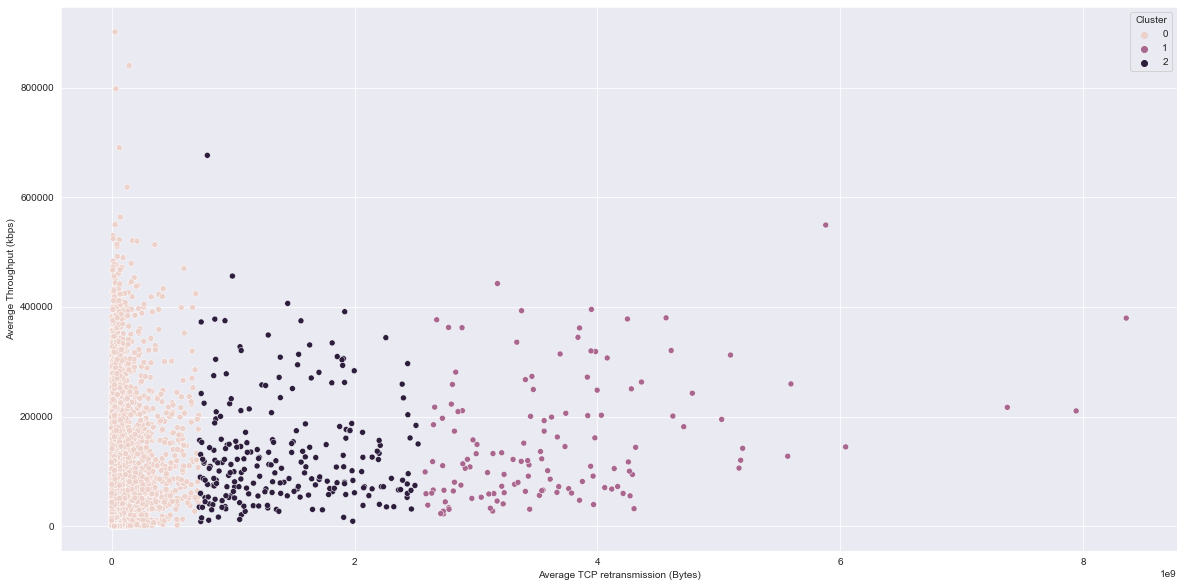

In [32]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x="Average TCP retransmission (Bytes)", y="Average Throughput (kbps)", hue = 'Cluster',  data=user_experience_db, ax=ax)

In [34]:
user_experience_db.loc[user_experience_db["Cluster"] == 0].sort_values(by=["Average TCP retransmission (Bytes)","Average RTT (ms)"], ascending=False)

,Handset Type,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Average RTT (ms),Average TCP retransmission (Bytes),Average Throughput (kbps),Cluster
MSISDN/Number,,,,,,,,,,,
3.366237e+10,Huawei B528S-23A,1056.0,2751.0,184404.0,18090.0,698404620.0,19043954.0,3807.0,717448574.0,202494.0,0
3.365961e+10,Samsung Galaxy S7 (Sm-G930X),84.0,9.0,41340.0,991.0,715560512.0,36216.0,93.0,715596728.0,42331.0,0
3.365862e+10,Huawei B525S-23A,153.0,35.0,168166.0,8889.0,714128823.0,75760.0,188.0,714204583.0,177055.0,0
3.376354e+10,Huawei B528S-23A,238.0,56.0,95381.0,11496.0,711426896.0,540998.0,294.0,711967894.0,106877.0,0
3.369915e+10,Huawei B528S-23A,90.0,47.0,32812.0,20038.0,708272510.0,841142.0,137.0,709113652.0,52850.0,0
...,...,...,...,...,...,...,...,...,...,...,...
3.360783e+10,Apple iPhone 5C (A1529),29.0,3.0,16242.0,611.0,62.0,81.0,32.0,143.0,16853.0,0
3.362636e+10,Apple iPhone 7 (A1778),34.0,6.0,10128.0,836.0,92.0,42.0,40.0,134.0,10964.0,0
3.376206e+10,Apple iPhone 8 (A1905),39.0,2.0,31540.0,1037.0,38.0,91.0,41.0,129.0,32577.0,0
